# Graph-Level Features and Graph Kernels

## Graph-Level Features
![](figures/02-tradition-ml_42.jpeg)
![](figures/02-tradition-ml_43.jpeg)

## Graph Kernels
![](figures/02-tradition-ml_44.jpeg)
![](figures/02-tradition-ml_45.jpeg)
![](figures/02-tradition-ml_46.jpeg)

###  Graphlet Kernel
![](figures/02-tradition-ml_47.jpeg)
![](figures/02-tradition-ml_48.jpeg)
![](figures/02-tradition-ml_49.jpeg)
![](figures/02-tradition-ml_50.jpeg)
![](figures/02-tradition-ml_51.jpeg)
![](figures/02-tradition-ml_52.jpeg)

### Weisfeiler-Lehman Kernel

![](figures/02-tradition-ml_53.jpeg)
![](figures/02-tradition-ml_54.jpeg)
![](figures/02-tradition-ml_55.jpeg)
![](figures/02-tradition-ml_56.jpeg)
![](figures/02-tradition-ml_57.jpeg)
![](figures/02-tradition-ml_58.jpeg)
![](figures/02-tradition-ml_59.jpeg)
![](figures/02-tradition-ml_60.jpeg)
![](figures/02-tradition-ml_61.jpeg)

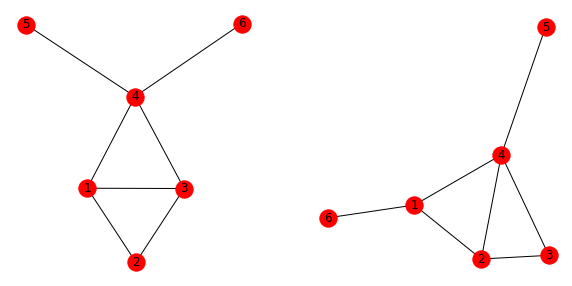

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G_1 = nx.Graph()
G_1.add_nodes_from([1,2,3,4,5,6])
G_1.add_edges_from([(1,2),
                    (1,3),
                    (1,4),
                    (2,3),
                    (3,4),
                    (4,5),
                    (4,6)
                   ])
G_2 = nx.Graph()
G_2.add_nodes_from([1,2,3,4,5,6])
G_2.add_edges_from([(1,2),
                    (1,4),
                    (1,6),
                    (2,3),
                    (2,4),
                    (3,4),
                    (4,5)
                   ])

fig, ax = plt.subplots(1, 2, figsize=(10,5))
nx.draw(G_1, with_labels=True, node_color="r", ax=ax[0])
nx.draw(G_2, with_labels=True, node_color="r", ax=ax[1])

In [48]:
# modified from https://networkx.org/documentation/stable/_modules/networkx/algorithms/graph_hashing.html#weisfeiler_lehman_graph_hash
from collections import Counter
from hashlib import blake2b

def weisfeiler_lehman_graph_hash(G, iterations=2):
    def neighborhood_aggregate(G, node, node_labels):
        """
        Compute new labels for given node by aggregating
        the labels of each node's neighbors.
        """
        label_list = [node_labels[node]]
        for nei in G.neighbors(node):
            label_list.append(node_labels[nei])
        return "".join(sorted(label_list))

    def weisfeiler_lehman_step(G, labels):
        """
        Apply neighborhood aggregation to each node
        in the graph.
        Computes a dictionary with labels for each node.
        """
        new_labels = dict()
        for node in G.nodes():
            new_labels[node] = neighborhood_aggregate(
                G, node, labels
            )
        return new_labels
    items = []
        
    node_labels = dict()
    # set initial node labels as "1"
    for node in G.nodes():
        node_labels[node] = "1"
        
    counter = Counter()
    counter.update(node_labels.values())
    items.extend(sorted(counter.items(), key=lambda x: x[0]))

    for k in range(iterations):
        node_labels = weisfeiler_lehman_step(G, node_labels)
        counter = Counter()
        # count node labels
        for node, d in node_labels.items():
            h = blake2b(digest_size=8)
            h.update(d.encode("ascii"))
            counter.update([h.hexdigest()])
        # sort the counter, extend total counts
        items.extend(counter.items())
    return items

In [68]:
import pandas as pd

color_1 = {color:cnt for color,cnt in weisfeiler_lehman_graph_hash(G_1, iterations=2)}
color_2 = {color:cnt for color,cnt in weisfeiler_lehman_graph_hash(G_2, iterations=2)}
colors = pd.concat(
    [pd.DataFrame.from_dict(color_1, orient='index', columns=['count_1']),
     pd.DataFrame.from_dict(color_2, orient='index', columns=['count_2'])],
    axis='columns'
    ).fillna(0)
colors

,count_1,count_2
1,6.0,6.0
ae7014f201e7b2a8,2.0,2.0
f4ba2bd4d02599c9,1.0,1.0
319963570400ab70,1.0,1.0
d9614b235de46ab6,2.0,2.0
a375337db7603b40,2.0,1.0
6bfd2e2c856f60f0,1.0,0.0
c8b89dc56032babf,1.0,0.0
f137e6c24929a1ba,2.0,1.0
df2a901b2ec10270,0.0,1.0


## Summary

![](figures/02-tradition-ml_62.jpeg)